## Load things

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from ipywidgets import interact
import os,sys
# sys.addaudithook
rpath = os.getcwd()
sys.path.insert(0,"../")
# import utils

import dimred ### library of dimension reduction

In [2]:
import ipywidgets
from ipywidgets import interact

from dimred.data.loader import LoadOne
from dimred.data.preprocess import MinMaxScalar,ZeroMeanScalar,MeanMaxScalar,AvgMaxScalar
# dimred.
from dimred.data.preprocess import scale_sanity,Scalar,Shaper,scaleMax

from dimred.models.linear.transform import Kurtosis
from dimred.models.linear.transform import co_variance,co_kurtosis
from dimred.tester.plotting import plot_embedding,plot_compare
from dimred.tester.metrics import mean_sq_error,mean_abs_error,abs_err

from dimred.gaspipe import transform_step,cantera_step,build_dictionary,retain_analysis
from dimred.tester.plotting import plot_spectra,img_compare,plot_bars
loader = LoadOne()


## Read data

In [3]:
loader = LoadOne()

In [4]:
# domains = (1,4)

# xrig = loader.getDomain(domains)
# loader.plotImg(spec=12)

reading file autoignition.1.0000E-05.field.mpi...


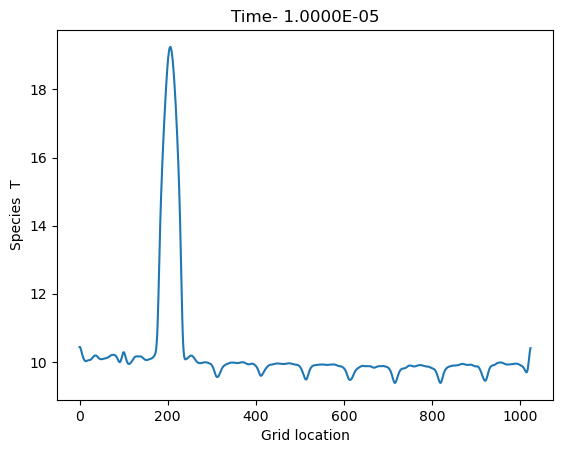

In [4]:
time_step = 100

xrig = loader.getTime(time_step,verbose=3)[:,:14]
loader.plotLine(spec=12,time=time_step)

## Dim reduction

 Transformation

- xreduced is 4D vector:
- project back to original space
- Low rank newly reconstructed matrix

In [4]:
from dimred.gaspipe import transform_step,cantera_step,build_dictionary,retain_analysis
from dimred.tester.plotting import plot_spectra

reading file autoignition.9.0000E-06.field.mpi...
co_variance reconstruction error after retaining 4 vectors is 0.0024
co_kurtosis reconstruction error after retaining 4 vectors is 0.0021


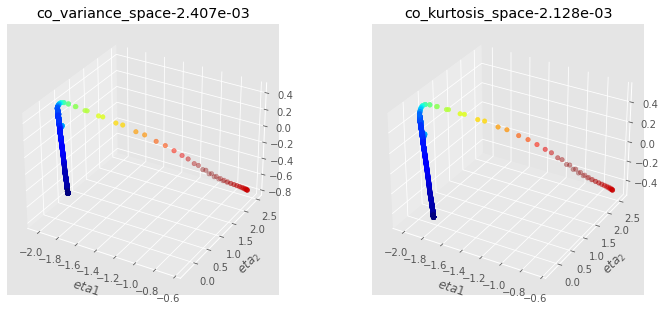

In [5]:
def mf_embed(time_step=100):
    xrig = loader.getTime(time_step,verbose=-1)[:,:14]
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(121, projection='3d')
    cmv,xold,xnew = transform_step(xrig,moment=co_variance, scalar=AvgMaxScalar,plt_ax=ax,verbose=False)

    ax = fig.add_subplot(122, projection='3d')
    cmk,kold,knew = transform_step(xrig,moment=co_kurtosis, scalar=AvgMaxScalar,plt_ax=ax,verbose=False)        


mf_embed(90)

In [6]:
interact(mf_embed,time_step=range(201))

interactive(children=(Dropdown(description='time_step', index=100, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, …

<function __main__.mf_embed(time_step=100)>

reading file autoignition.1.0000E-05.field.mpi...
co_variance reconstruction error after retaining 4 vectors is 0.0045
co_kurtosis reconstruction error after retaining 4 vectors is 0.0038


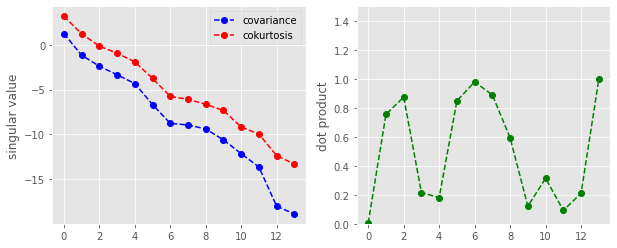

In [7]:
def mf_orient(time_step=100):
    # time_step = 100
    xrig = loader.getTime(time_step,verbose=-1)[:,:14]
    cmv,xold,xnew = transform_step(xrig,moment=co_variance, scalar=AvgMaxScalar,verbose=False,plots=False)
    cmk,kold,knew = transform_step(xrig,moment=co_kurtosis, scalar=AvgMaxScalar,verbose=False,plots=False)
    plot_spectra(cmv.s,cmk.s,cmv.u,cmk.u)

mf_orient()

In [8]:

interact(mf_orient,time_step=range(201))

interactive(children=(Dropdown(description='time_step', index=100, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, …

<function __main__.mf_orient(time_step=100)>

reading file autoignition.9.0000E-06.field.mpi...
Average Error is 0.0000


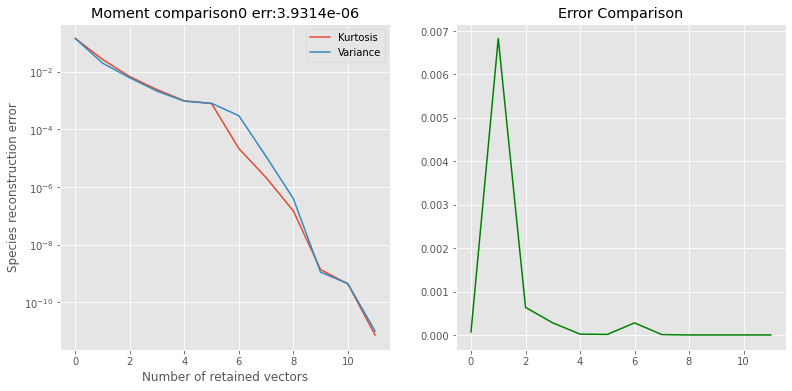

In [9]:
def mf_retain(time_step=100,scale='log'):
    xrig = loader.getTime(time_step,verbose=-1)[:,:14]
    verr = retain_analysis(xrig,moment=co_variance).reshape(-1,1)
    kerr = retain_analysis(xrig,moment=co_kurtosis).reshape(-1,1)
    fig = plot_compare(verr,kerr,titler="Moment comparison",species=0,labels=["Kurtosis","Variance"])
    fig.axes[0].set_xlabel("Number of retained vectors")
    fig.axes[0].set_ylabel("Species reconstruction error")
    fig.axes[0].set_yscale(scale)

mf_retain(90)


In [10]:
interact(mf_retain,time_step=range(201),scale=['linear','log'])

interactive(children=(Dropdown(description='time_step', index=100, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, …

<function __main__.mf_retain(time_step=100, scale='log')>

## Interactive!

In [11]:
time_step = 100
num_retain=4

xrig = loader.getTime(time_step,verbose=-1)[:,:14]
total = build_dictionary(xrig,retain=num_retain)


reading file autoignition.1.0000E-05.field.mpi...
co_variance reconstruction error after retaining 4 vectors is 0.0045
co_kurtosis reconstruction error after retaining 4 vectors is 0.0038


In [12]:

def f(moment,source,specs=0):
    plot_compare(total[moment]['old'][source],
                 total[moment]['new'][source],species=specs)

interact(f,moment=total.keys(),source=total['covariance']['old'].keys(),specs=loader.varid)

interactive(children=(Dropdown(description='moment', options=('covariance', 'cokurtosis'), value='covariance')…

<function __main__.f(moment, source, specs=0)>

In [13]:
loader.varid

{'H2': 0,
 ' O2': 1,
 ' O': 2,
 ' OH': 3,
 ' H2O': 4,
 ' H': 5,
 ' HO2': 6,
 ' H2O2': 7,
 ' CO': 8,
 ' CO2': 9,
 ' HCO': 10,
 ' N2': 11,
 ' T': 12,
 ' P': 13,
 ' vx': 14,
 ' vy': 15,
 ' vz': 16}

In [1]:
def f(source):
    moment = "covariance"
    errcv = abs_err(total[moment]['old'][source] ,total[moment]['new'][source])
    moment = "cokurtosis"
    errck = abs_err(total[moment]['old'][source] ,total[moment]['new'][source])

    plot_bars(errcv,errck)

interact(f,source=total['covariance']['old'].keys())

NameError: name 'interact' is not defined